In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import dataset.

In [2]:
df = pd.read_csv("data/car_dekho_full.csv")
df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


Advanced EDA plotting.

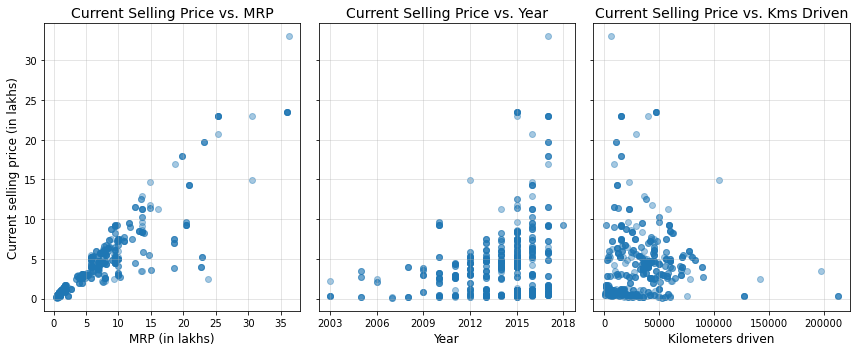

In [3]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

fontsize = 14

cols = ["MRP", "Year", "Kms_Driven"] 
title_vs_text = ["MRP", "Year", "Kms Driven"]
xlabels = ["MRP (in lakhs)", "Year", "Kilometers driven"]

for i, (ax, col, title_vs, xlabel) in enumerate(
    zip(axes, cols, title_vs_text, xlabels)
):

    ax.scatter(df[col], df["Current_Selling_Price"], alpha=0.4)
    ax.set_title(
        f"Current Selling Price vs. {title_vs}",
        fontsize=fontsize,
    )
    ax.set_xlabel(xlabel, fontsize=fontsize-2)
    ax.set_ylabel(
        "Current selling price (in lakhs)" if i==0 else None, 
        fontsize=fontsize-2
    )
    ax.grid(":", alpha=0.4)
    
    if col=="Year":
        min_year = df[col].min()
        max_year = df[col].max()
        ax.set_xticks(np.arange(min_year, max_year+1, 3))

plt.tight_layout()
plt.show()

Import another dataset.

In [4]:
df2 = pd.read_csv("data/Income_prediction.csv")


Advanced EDA plotting. Histogram hued by gender.

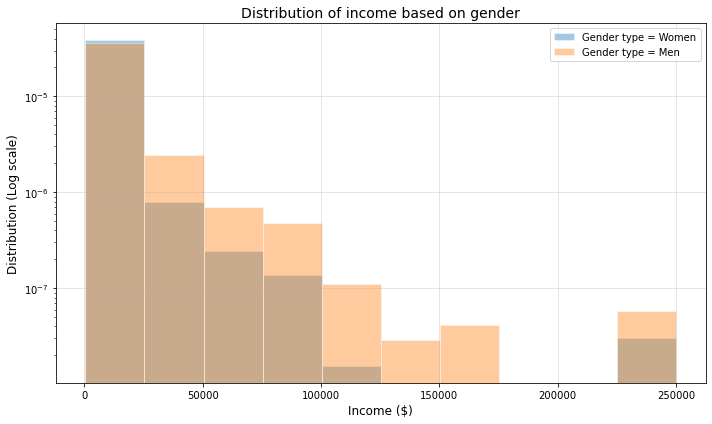

In [5]:
gendermap = {0:"Women", 1:"Men"}

fig, ax = plt.subplots(1,1, figsize=(10,6))
for i in gendermap.keys():
    ax.hist(
        df2[df2.gender==i].income,
        log=True,
        label = f"Gender type = {gendermap[i]}", 
        alpha=0.4,
        bins = 10,
        density=True,
        edgecolor="w",
    )
    ax.legend(loc="best")
    ax.set_xlabel("Income ($)", fontsize=12)
    ax.set_ylabel("Distribution (Log scale)", fontsize=12)

plt.title("Distribution of income based on gender", fontsize=14)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

Advanced EDA plotting. Barplot of categorical variables vs. mean continuous outcome. Using `groupby` and `mean`.

KeyError: 'complexion'

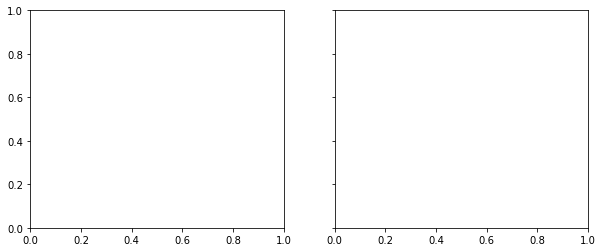

In [6]:
fig, axes = plt.subplots(1,2, sharey=True, figsize =(10,4))
df.groupby(["complexion"]).mean().income.plot(
    kind="bar", alpha=0.8, ax=axes[0]
)
axes[0].set_xlabel("Complexion", fontsize=12)
axes[0].set_title("Mean income by skin complexion", fontsize=14)
axes[0].set_xticklabels(
    ["Very fair","Fair","Wheatish","Medium","Dark"], rotation=0
)
plt.grid(":", alpha=0.4)

df.groupby(["eating"]).mean().income.plot(kind="bar", alpha=0.8, ax=axes[1])
axes[1].set_xticklabels(
    ["No preference","Jain","Veg","Veg + eggs ","Non-veg"], rotation=0
)
axes[1].set_xlabel("Food eating preference", fontsize=12)
axes[1].set_title("Mean income by eating type", fontsize=14)

for ax in axes:
    ax.set_ylabel("Mean income ($)", fontsize=12)
    ax.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()

Scatter matrix for quantative variables.

In [ ]:
attr_list = [
    "income",
    "age",
    "height",
    "bmi",
    "status",
    "complexion",
    "education",
]

scatter = pd.plotting.scatter_matrix(
    df2[attr_list], alpha=0.2, figsize=(12,8)
)
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45, fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), rotation = 45, fontsize=12)
plt.suptitle(
    "Scatter matrix of SimplyMarry.com quantitative and ordinal attributes",
    fontsize=18,
    y=0.95,
)
plt.show()

A method to identify categorical variables and continuous variables.

In [ ]:
cat_vars = []
for col in df2.columns.to_list():
    if (len(df2[col].unique()) < 15):
        cat_vars.append(col)
cat_vars